# Model Training

---

In this notebook, I will train a Reinforcement Learning Agent to collect yellow bananas and avoid blue bananas.

### Import necessary packages

In [6]:
from unityagents import UnityEnvironment
from agent import *
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### Start the Bananas environment

In [2]:
env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Train the Agent

Now I train the agent to solve the environment using DQN.

In [5]:
# initialize agent
agent = Agent(state_size=state_size, 
              action_size=action_size, 
              seed=0)

# train and get scores
scores = agent.train(env)

Episode 100	Average Score: 1.31
Episode 200	Average Score: 5.56
Episode 300	Average Score: 8.77
Episode 400	Average Score: 10.42
Episode 499	Average Score: 13.00
Environment solved in 399 episodes!	Average Score: 13.00


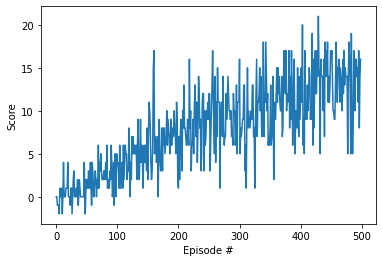

In [6]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Double DQN

In [8]:
# initialize agent
agent = Agent_DoubleDQN(state_size=state_size,
                        action_size=action_size, 
                        seed=0)

# train and get scores
scores = agent.train(env)

RuntimeError: input and target shapes do not match: input [64 x 1], target [64 x 64 x 4] at /Users/soumith/code/builder/wheel/pytorch-src/aten/src/THNN/generic/MSECriterion.c:13

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [ ]:
# initialize agent
agent = Agent(state_size=state_size, 
              action_size=action_size, 
              seed=0)

# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# get the current state
state = env_info.vector_observations[0] 

# initialize the score
score = 0 

while True:
    # select an action
    action = np.random.randint(action_size) 
    # send the action to the environment
    env_info = env.step(action)[brain_name] 
    # get the next state
    next_state = env_info.vector_observations[0] 
    # get the reward
    reward = env_info.rewards[0]
    # see if episode has finished
    done = env_info.local_done[0]   
    # update the score
    score += reward 
    # roll over the state to next time step
    state = next_state 
    # exit loop if episode finished
    if done:                                       
        break
    
print("Score: {}".format(score))
            
env.close()